In [306]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

In [307]:
fire_file = "../data/fire/NFDB_poly/NFDB_poly_20210707.shp"
save_file_location = "../fire/2018.shp"

# Explore fires from all years

In [308]:
fire = gpd.read_file(fire_file)
fire = fire.to_crs("EPSG:4326")

In [309]:
fire.head()

,SRC_AGENCY,FIRE_ID,FIRENAME,YEAR,MONTH,DAY,REP_DATE,DATE_TYPE,OUT_DATE,DECADE,...,UNBURN_REM,MORE_INFO,POLY_DATE,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,AG_SRCFILE,ACQ_DATE,SRC_AGY2,geometry
0,BC,2004-C10175,None,2004,6,23,2004/06/23,Report date,0000/00/00,2000-2009,...,None,None,2007/05/17,BC-2004-C10175,None,None,H_FIRE_PLY,2011/06/10,BC,"POLYGON Z ((-124.6106 53.08084 0, -124.6099 53..."
1,BC,2004-C10176,None,2004,6,23,2004/06/23,Report date,0000/00/00,2000-2009,...,None,None,2007/05/17,BC-2004-C10176,None,None,H_FIRE_PLY,2011/06/10,BC,"POLYGON Z ((-124.48262 53.06162 0, -124.4815 5..."
2,BC,2004-C50114,None,2004,6,20,2004/06/20,Report date,0000/00/00,2000-2009,...,None,None,2007/05/17,BC-2004-C50114,None,None,H_FIRE_PLY,2011/06/10,BC,"POLYGON Z ((-125.1276 52.13023 0, -125.12726 5..."
3,BC,2004-C50125,None,2004,6,21,2004/06/21,Report date,0000/00/00,2000-2009,...,None,None,2007/05/17,BC-2004-C50125,None,None,H_FIRE_PLY,2011/06/10,BC,"POLYGON Z ((-125.75419 52.27968 0, -125.75294 ..."
4,BC,2004-C50149,None,2004,6,22,2004/06/22,Report date,0000/00/00,2000-2009,...,None,None,2007/05/17,BC-2004-C50149,None,None,H_FIRE_PLY,2011/06/10,BC,"POLYGON Z ((-126.26477 52.9988 0, -126.26379 5..."


In [310]:
fire.shape

(59539, 27)

In [311]:
fire.columns.values

array(['SRC_AGENCY', 'FIRE_ID', 'FIRENAME', 'YEAR', 'MONTH', 'DAY',
       'REP_DATE', 'DATE_TYPE', 'OUT_DATE', 'DECADE', 'SIZE_HA',
       'CALC_HA', 'CAUSE', 'MAP_SOURCE', 'SOURCE_KEY', 'MAP_METHOD',
       'WATER_REM', 'UNBURN_REM', 'MORE_INFO', 'POLY_DATE', 'CFS_REF_ID',
       'CFS_NOTE1', 'CFS_NOTE2', 'AG_SRCFILE', 'ACQ_DATE', 'SRC_AGY2',
       'geometry'], dtype=object)

Text(0.5, 1.0, 'Fire Occurrence Count in CNFDB by Year')

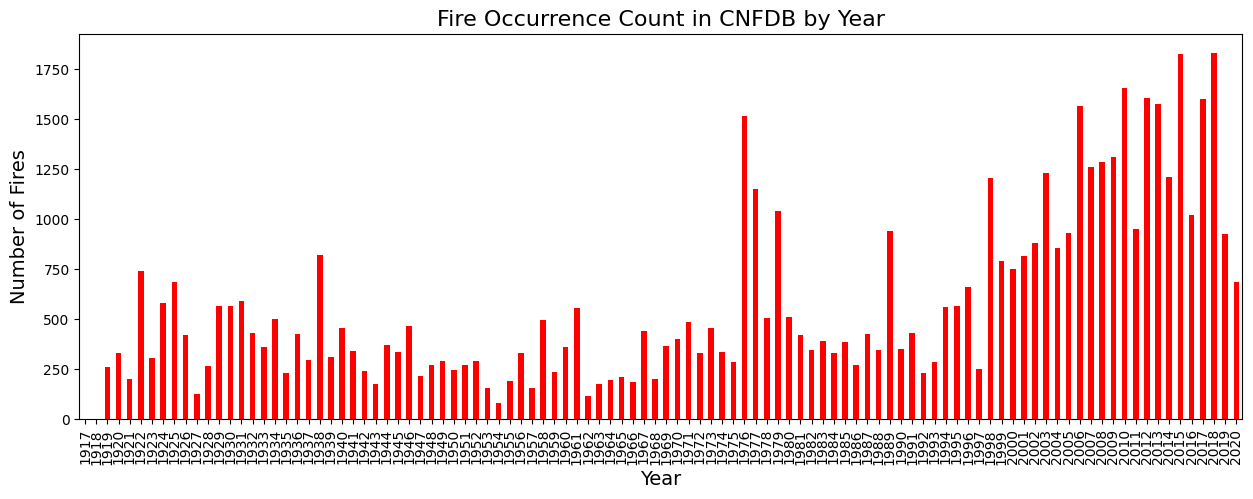

In [312]:
year_data_df = fire['YEAR'].value_counts().sort_index()[1:]

ax = year_data_df[year_data_df.index].plot(
    title="Fire Occurrence Count in CNFDB by Year",
    xlabel="Year",
    ylabel="Number of fires",
    kind="bar",
    figsize=(15,5),
    color="Red",
)

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Fires", fontsize=14)
ax.set_title("Fire Occurrence Count in CNFDB by Year", fontsize=16)

# xtick_positions = range(min(year_data_df.index), max(year_data_df.index) + 1, 5)
# ax.set_xticks(xtick_positions)

# xtick_labels = [str(year) for year in xtick_positions]
# ax.set_xticklabels(xtick_labels)

# plt.show()

Text(0.5, 1.0, 'Natural Fire Occurrence Count in CNFDB by Year')

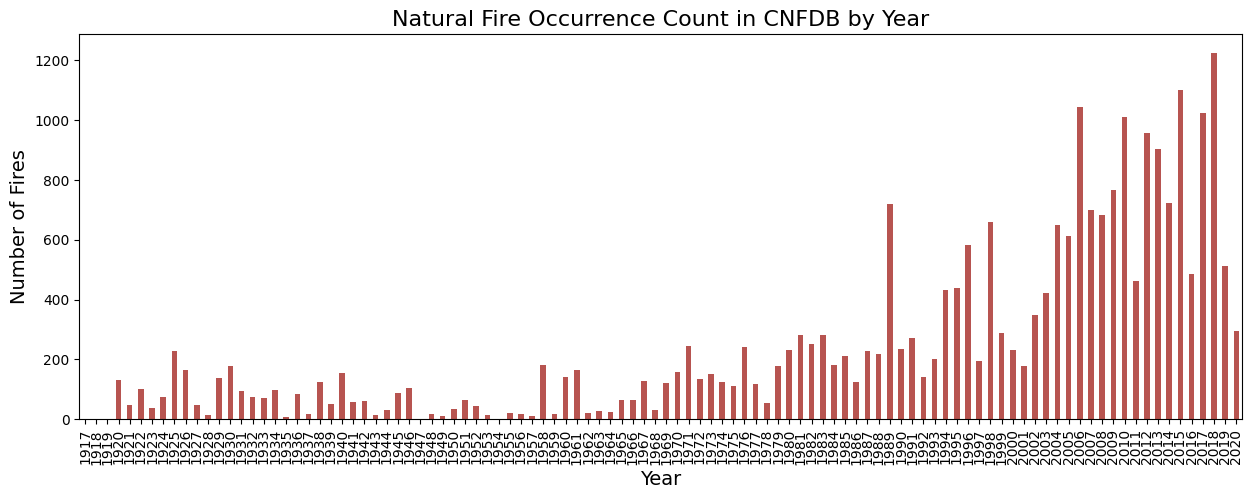

In [365]:
natural_fire_yr_df = fire[fire.CAUSE == 'L']['YEAR'].value_counts().sort_index()[1:]
natural_fire_yr_df[1917] = 0
natural_fire_yr_df[1918] = 0
natural_fire_yr_df[1919] = 0
natural_fire_yr_df = natural_fire_yr_df.sort_index()

ax = natural_fire_yr_df.plot(
    title="Natural Fire Occurrence Count in CNFDB by Year",
    xlabel="Year",
    ylabel="Number of fires",
    kind="bar",
    figsize=(15,5),
    color=[184/256, 84/256, 80/256],
)

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Fires", fontsize=14)
ax.set_title("Natural Fire Occurrence Count in CNFDB by Year", fontsize=16)

# xtick_positions = range(min(natural_fire_yr_df.index), max(natural_fire_yr_df.index) + 1, 5)
# ax.set_xticks(xtick_positions)

# xtick_labels = [str(year) for year in xtick_positions]
# ax.set_xticklabels(xtick_labels)

# plt.show()

In [314]:
natural_fire_yr_df[(natural_fire_yr_df.index >= 1998) & (natural_fire_yr_df.index <= 2018)].sum()

14480

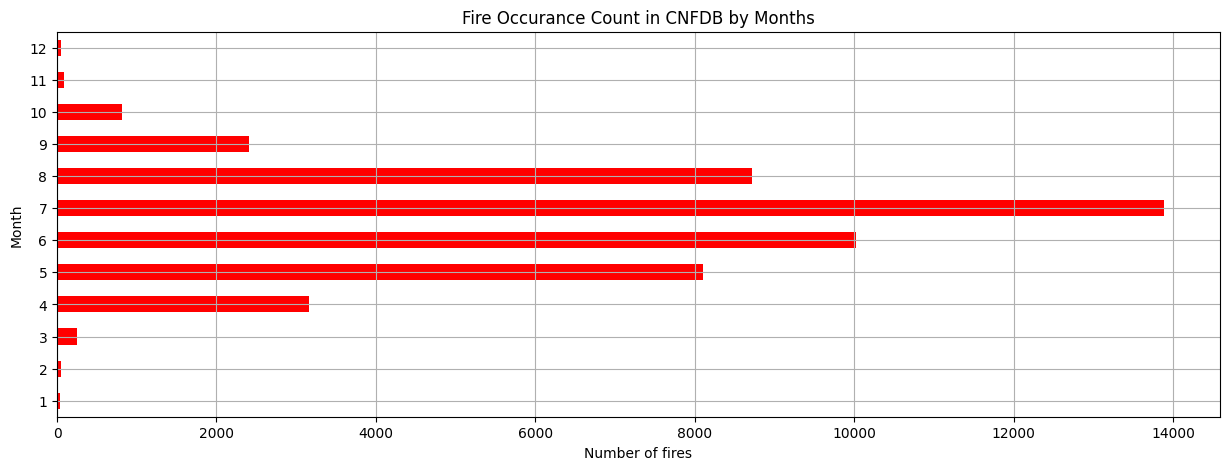

In [315]:
ax = fire['MONTH'].value_counts().sort_index()[1:].plot(
    title="Fire Occurance Count in CNFDB by Months",
    kind="barh", 
    grid=True, 
    figsize=(15,5),
    xlabel="Number of fires",
    ylabel="Month",
    color="Red",
    )

In [333]:
# get natural fire data by month
natural_fire_month_df = pd.DataFrame(fire[(fire.CAUSE == 'L') & (fire.YEAR >= 1998) & (fire.YEAR <= 2018)]['MONTH'].value_counts().sort_index()[1:]).reset_index()
natural_fire_month_df['MONTH'] = natural_fire_month_df.apply(lambda row: datetime.date(1900, row.MONTH, 1).strftime('%B'), axis=1)
natural_fire_month_df = natural_fire_month_df.set_index('MONTH')

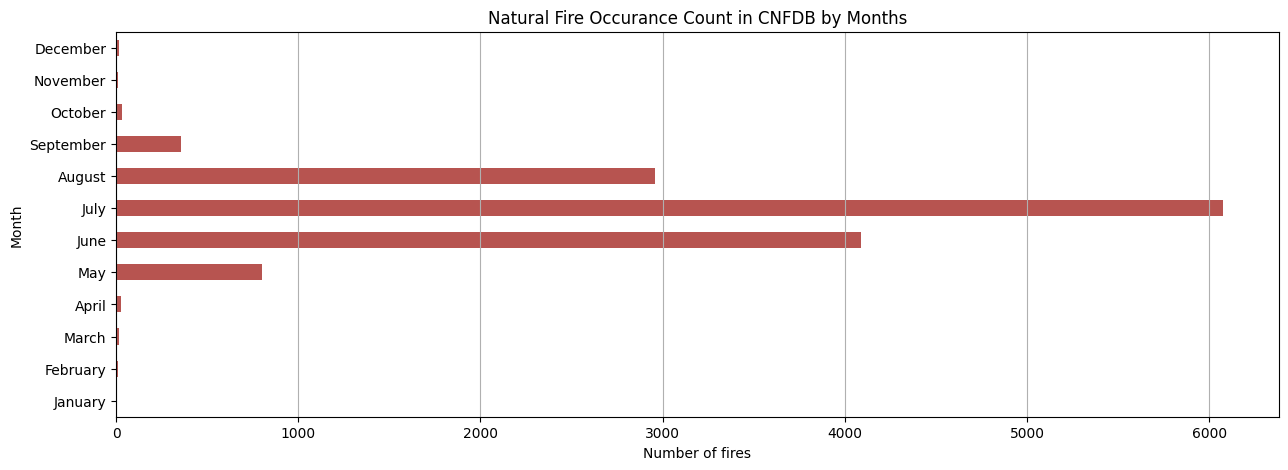

In [364]:
ax = natural_fire_month_df.plot(
    title="Natural Fire Occurance Count in CNFDB by Months",
    kind="barh", 
    grid=True, 
    figsize=(15,5),
    xlabel="Number of fires",
    ylabel="Month",
    color=[184/256, 84/256, 80/256],
    legend=False
).grid(
    axis="y"
)

In [329]:
# get distribution over m
for m in range(12):
    natural_fire_month_df[f"M={m+1}"] = np.roll(natural_fire_month_df['count'], shift=-(m+1))

natural_fire_month_df

,count,M=1,M=2,M=3,M=4,M=5,M=6,M=7,M=8,M=9,M=10,M=11,M=12
MONTH,,,,,,,,,,,,,
January,6,11,15,28,802,4086,6076,2956,354,34,13,16,6
February,11,15,28,802,4086,6076,2956,354,34,13,16,6,11
March,15,28,802,4086,6076,2956,354,34,13,16,6,11,15
April,28,802,4086,6076,2956,354,34,13,16,6,11,15,28
May,802,4086,6076,2956,354,34,13,16,6,11,15,28,802
June,4086,6076,2956,354,34,13,16,6,11,15,28,802,4086
July,6076,2956,354,34,13,16,6,11,15,28,802,4086,6076
August,2956,354,34,13,16,6,11,15,28,802,4086,6076,2956
September,354,34,13,16,6,11,15,28,802,4086,6076,2956,354


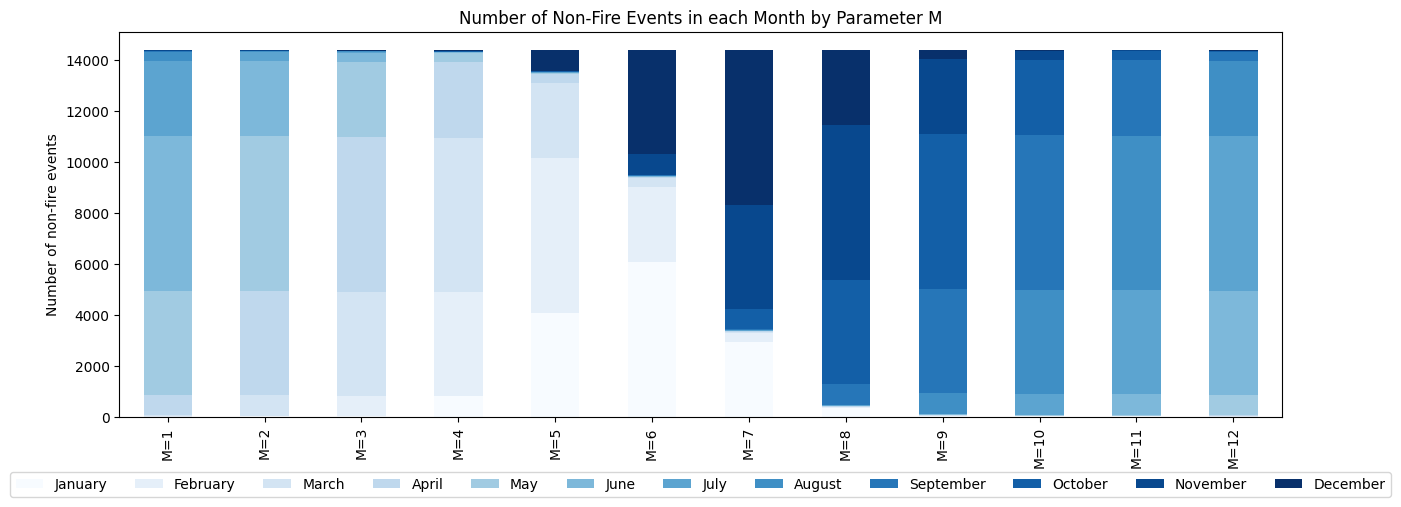

In [331]:
fig, ax = plt.subplots(figsize=(15,5))

natural_fire_month_df[[f"M={m+1}" for m in range(12)]].T.plot(
    kind='bar',
    stacked=True,
    ax = ax,
    colormap=plt.cm.Blues,
    title="Number of Non-Fire Events in each Month by Parameter M",
    ylabel="Number of non-fire events"
)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), ncol=12)

In [297]:
natural_fire_month_df['count'].sum()

14397

# Exploring cause of fire

In [93]:
fire['CAUSE'].value_counts()

L       25598
H       21311
n/a      7212
U        5140
H-PB      271
Re          7
Name: CAUSE, dtype: int64

In [103]:
( 25598 + 21311 + 7212 )

54121

In [104]:
(fire['CAUSE'].value_counts()/54121*100)

L       47.297722
H       39.376582
n/a     13.325696
U        9.497238
H-PB     0.500730
Re       0.012934
Name: CAUSE, dtype: float64

# Exploring Month of fire

<AxesSubplot:>

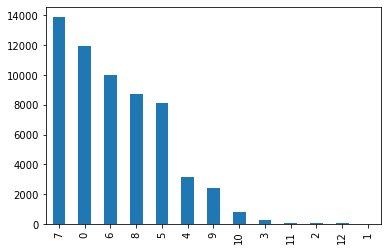

In [55]:
fire['MONTH'].value_counts().plot(kind="bar")

# Extract canada geometry

In [350]:
naturalearth_lowres = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(naturalearth_lowres)

In [358]:
canada = world[world.NAME == 'Canada']
del world

# Plots

## Canada Fire Data By Cause

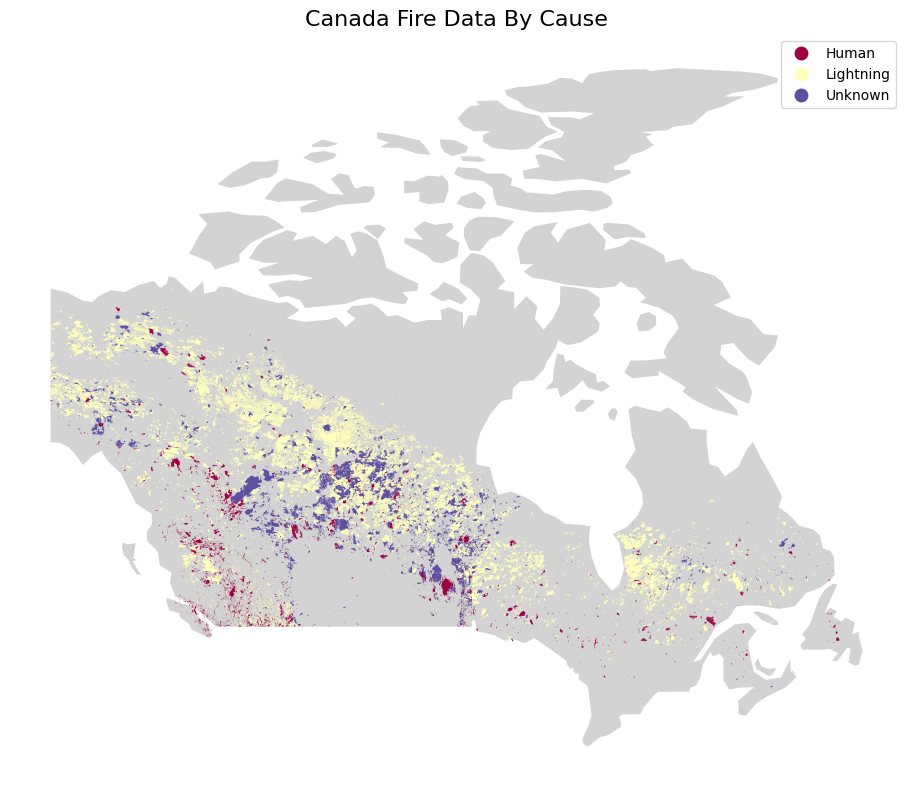

In [359]:
fire['Cause'] = fire['CAUSE'].apply(lambda val: "Lightning" if val == 'L' else "Human" if (val == 'H') or (val == 'H-PB') else "Unknown" )
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire.plot(
    ax=ax, 
    categorical=True, 
    cmap='Spectral', 
    column='Cause', 
    legend=True,
#     legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':12,'frameon':False},
    linewidth=.6,
)

ax.axis('off')
ax.set_title('Canada Fire Data By Cause',fontsize=16)

plt.tight_layout()

## Canada Fire Data By Month

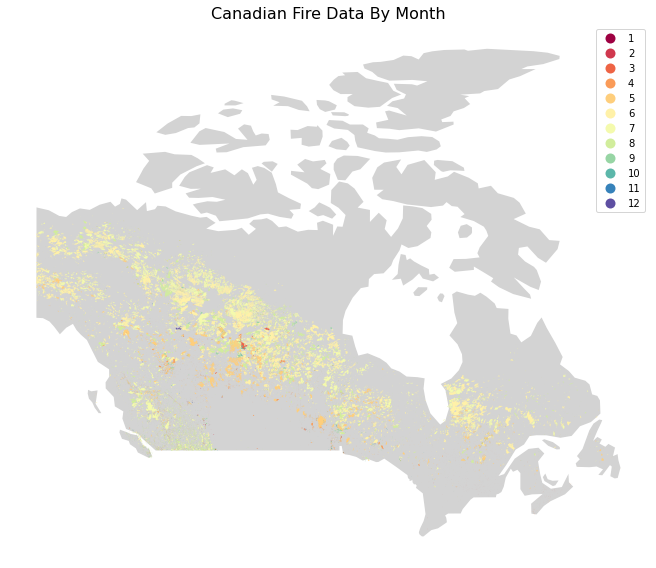

In [109]:
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire[fire['MONTH'] != 0].plot(
    ax=ax, 
    categorical=True, 
    cmap='Spectral', 
    column='MONTH', 
    legend=True,
#     legend_kwds={'bbox_to_anchor':(.3, 1.05),'fontsize':12,'frameon':False},
    linewidth=.6,
)

ax.axis('off')
ax.set_title('Canadian Fire Data By Month',fontsize=16)

plt.tight_layout()

## Canada Fire Data By Year

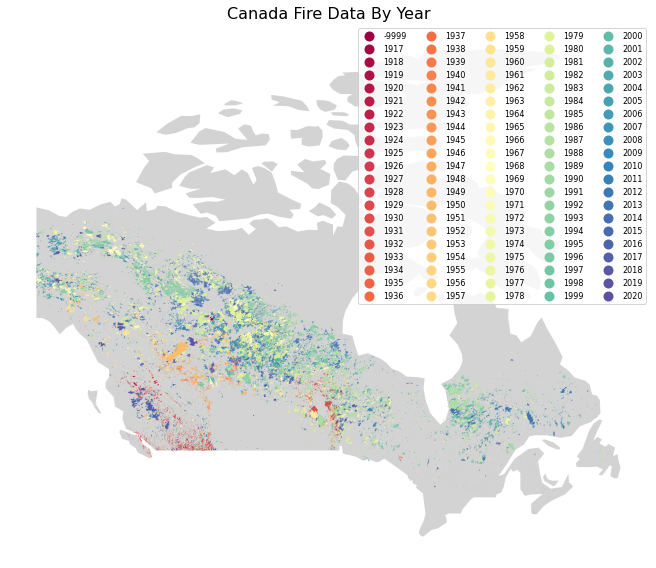

In [67]:
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire.plot(
    ax=ax, 
    categorical=True, 
    cmap='Spectral', 
    column='YEAR', 
    legend=True,
    legend_kwds={'fontsize':8,'frameon':True, 'ncol':5},
    linewidth=.6,
)

ax.axis('off')
ax.set_title('Canada Fire Data By Year',fontsize=16)

plt.tight_layout()

# Explore 2018 Fires

In [4]:
fire_2018 = fire[fire["YEAR"] == 2018]
# del fire

In [5]:
fire_2018 = fire_2018.to_crs("EPSG:4326")

In [31]:
fire_2018.head()

,SRC_AGENCY,FIRE_ID,FIRENAME,YEAR,MONTH,DAY,REP_DATE,DATE_TYPE,OUT_DATE,DECADE,...,UNBURN_REM,MORE_INFO,POLY_DATE,CFS_REF_ID,CFS_NOTE1,CFS_NOTE2,AG_SRCFILE,ACQ_DATE,SRC_AGY2,geometry
20301,BC,2018-N52722,None,2018,8,11,2018-08-11,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-N52722,None,None,None,2019-05-01,BC,"POLYGON Z ((-118.00957 50.09268 0.00000, -118...."
20302,BC,2018-C31701,None,2018,7,30,2018-07-30,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-C31701,None,None,None,2019-05-01,BC,"POLYGON Z ((-120.47005 52.89034 0.00000, -120...."
20303,BC,2018-G90358,None,2018,5,23,2018-05-23,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-G90358,None,None,None,2019-05-01,BC,"POLYGON Z ((-123.72140 58.46164 0.00000, -123...."
20304,BC,2018-N52073,None,2018,8,2,2018-08-02,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-N52073,None,None,None,2019-05-01,BC,"POLYGON Z ((-117.57547 50.09645 0.00000, -117...."
20305,BC,2018-K42099,None,2018,7,31,2018-07-31,Report date,None,2010-2019,...,None,None,None,BC-2018-2018-K42099,None,None,None,2019-05-01,BC,"POLYGON Z ((-118.62263 50.73653 0.00000, -118...."


In [34]:
fire_2018.shape

(1833, 27)

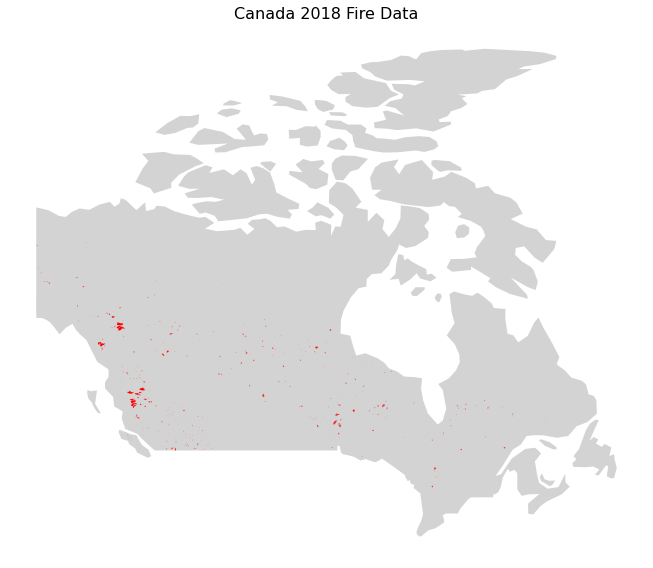

In [30]:
fig, ax = plt.subplots(1, figsize=(14,8))

canada.plot(
    color="lightgray",
    ax=ax,
)

fire_2018.plot(
    ax=ax,  
    markersize=.1,
    color="red"
)

ax.axis('off')
ax.set_title('Canada 2018 Fire Data',fontsize=16)

plt.tight_layout()

In [14]:
fire_2018.to_file(save_file_location, mode='w')